In [ ]:
%run _report.py


 ATTN !! _22_ LEDGER EXPORTED _df_costs_1_2_complete_LEDGER.pkl


BROCKAGE COSTS till 2022-07-01 are $ 606



In [60]:
#df_from_scratch = dfr

In [61]:
import pandas as pd

# Assuming df_from_scratch is your DataFrame and it is already loaded

# Convert 'AnalysisEndDate' to datetime
df_from_scratch['AnalysisEndDate'] = pd.to_datetime(df_from_scratch['AnalysisEndDate'])

# Sort DataFrame by 'AnalysisEndDate'
df_from_scratch = df_from_scratch.sort_values(by='AnalysisEndDate')

# Set 'AnalysisEndDate' as the index
df_from_scratch.set_index('AnalysisEndDate', inplace=True)

# Function to calculate rolling returns
def calculate_rolling_return(df, window):
    if len(df) >= window:
        return (df['return_percentage'].rolling(window=window).apply(lambda x: (1 + x / 100).prod() - 1) * 100).iloc[-1]
    return None

# Calculate rolling returns
one_month_return = calculate_rolling_return(df_from_scratch, 1)
three_month_return = calculate_rolling_return(df_from_scratch, 3)
six_month_return = calculate_rolling_return(df_from_scratch, 6)
one_year_return = calculate_rolling_return(df_from_scratch, 12)
two_year_return = calculate_rolling_return(df_from_scratch, 24)
three_year_return = calculate_rolling_return(df_from_scratch, 36)

# Calculate since inception return from the first date to the latest available date using compound returns
since_inception_return = (df_from_scratch['return_percentage'].apply(lambda x: 1 + x / 100).prod() - 1) * 100

# Get the latest returns
latest_data = {
    "1 Month Return": one_month_return,
    "3 Month Return": three_month_return,
    "6 Month Return": six_month_return,
    "1 Year Return": one_year_return,
    "2 Year Return": two_year_return,
    "3 Year Return": three_year_return,
    "Since Inception Return": since_inception_return
}

# Print the results
for period, value in latest_data.items():
    if value is not None:
        print(f"{period}: {value:.2f}%")
    else:
        print(f"{period}: -")


1 Month Return: -1.51%
3 Month Return: 5.79%
6 Month Return: 16.02%
1 Year Return: 11.37%
2 Year Return: -
3 Year Return: -
Since Inception Return: 23.62%


In [83]:
benchmark = {
    '1 Month Return': -2.3781462517712252,
    '3 Month Return': 4.455184823426515,
    '6 Month Return': 15.567881997712469383,
    '1 Year Return': 9.450968385650105,
    '2 Year Return': None,
    '3 Year Return': None,
    'Since Inception Return': 19.8921644474062677
}

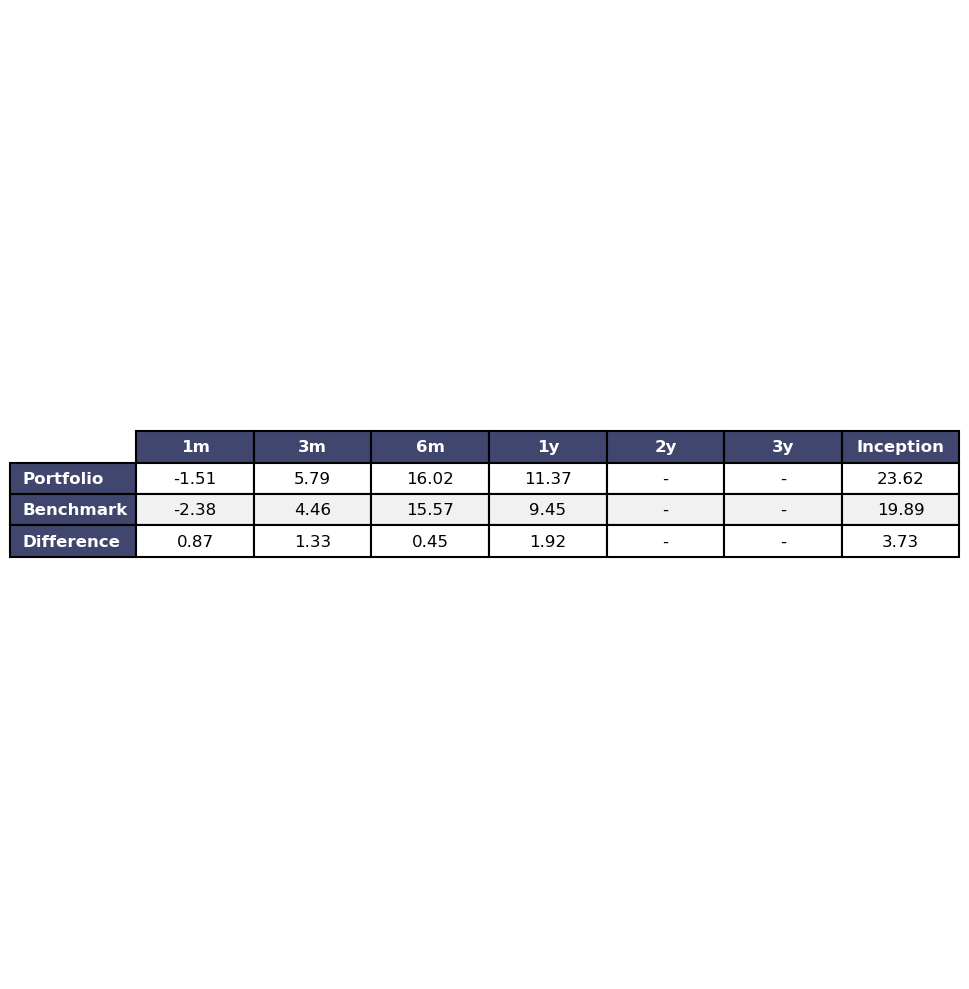

In [86]:
import pandas as pd
import matplotlib.pyplot as plt



# Create DataFrame
data = {
    '1m': [latest_data['1 Month Return'], benchmark['1 Month Return']],
    '3m': [latest_data['3 Month Return'], benchmark['3 Month Return']],
    '6m': [latest_data['6 Month Return'], benchmark['6 Month Return']],
    '1y': [latest_data['1 Year Return'], benchmark['1 Year Return']],
    '2y': [latest_data['2 Year Return'], benchmark['2 Year Return']],
    '3y': [latest_data['3 Year Return'], benchmark['3 Year Return']],
    'Inception': [latest_data['Since Inception Return'], benchmark['Since Inception Return']]
}

# Convert to DataFrame and calculate the difference row
df = pd.DataFrame(data, index=['Portfolio', 'Benchmark'])
df.loc['Difference'] = df.loc['Portfolio'] - df.loc['Benchmark']

# Replace None with '-' and round to 2 decimal places
df = df.applymap(lambda x: '-' if pd.isna(x) else round(x, 2))

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center')

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.7, 1.5)

# Enhance table appearance
for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1.5)
    if key[0] == 0:  # Header row
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='white', weight='bold')
    if key[1] == -1:  # Row labels
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='white', weight='bold')

# Set alternating row colors for better readability
rows, cols = df.shape
for row in range(1, rows + 1):
    for col in range(cols):
        cell = table[row, col]
        if row % 2 == 0:
            cell.set_facecolor('#f1f1f1')
        else:
            cell.set_facecolor('white')

# Adjust layout to make sure everything fits
plt.tight_layout()

# Save the plot with bbox_inches='tight' to ensure no clipping
plt.savefig('_PY_Compound_Returns.png', bbox_inches='tight', dpi=300)
plt.show()
